In [1]:
# Dependencies and Setup
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
#mouse_drug_data_load = os.path.join("data/mouse_drug_data.csv")
#clinical_trial_data_load = os.path.join("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
mouse_merge_df = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")


# Display the data table full view
mouse_merge_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
5,h246,0,45.000000,0,Ketapril
6,p189,0,45.000000,0,Ketapril
7,n923,0,45.000000,0,Ketapril
8,q119,0,45.000000,0,Ketapril
9,f993,0,45.000000,0,Naftisol


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = mouse_merge_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(tumor_volume_mean).reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_tumor_volume = mouse_merge_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
error_tumor_volume_df = pd.DataFrame(error_tumor_volume).reset_index()

# Full view DataFrame

error_tumor_volume_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_time_treatment = mean_tumor_volume_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug')
tumor_volume_error = error_tumor_volume_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'],'Drug') 
# Full view that Reformatting worked
#tumor_volume_error.head()
tumor_time_treatment


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Additional Calculation!!!

In [5]:
#Deducting the Standard Deviation from the Average Tumor Fluctuation Sites
tumorspread_minus_error = tumor_time_treatment - tumor_volume_error
#Full View Final Tumor Sites Data Frame
tumorspread_minus_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,43.817494,46.338546,46.826899,47.124356,46.593713,46.907498,47.017259,43.461904,47.287589,46.662868
10,42.381606,48.048981,49.121563,49.224848,48.374795,49.021266,48.725346,41.811733,49.030165,48.425932
15,41.225700,49.762002,50.938692,51.819706,50.488640,50.745280,50.601209,40.724629,51.036148,50.408515
20,39.806595,51.797566,52.721481,54.194451,53.048827,53.524808,52.791556,39.452125,53.445506,52.637151
25,39.057886,53.848318,55.164938,56.923569,55.918261,56.447702,54.926736,38.227308,55.424201,54.830422
30,37.834880,56.278897,57.668336,60.060386,58.584012,58.590832,57.450330,37.838232,58.927189,56.913488
35,36.764598,58.135300,59.758306,62.243819,61.671318,61.133134,59.265270,36.484563,61.437513,59.207946
40,35.734392,60.759390,62.107605,64.910131,64.482186,63.682041,61.480758,35.445635,63.945951,61.918177


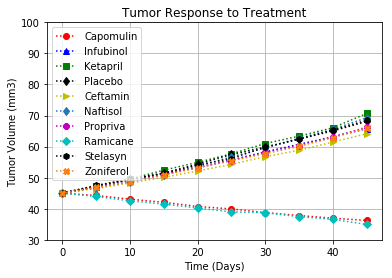

In [6]:
# Generate the Plot (without Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
markers={"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:', 
         "Ceftamin": 'y>:', "Naftisol": 'd:', "Propriva":'m8:', "Ramicane":'cD:', "Stelasyn": 'kh:', "Zoniferol": 'X:'}
fig1, ax1 = plt.subplots()

for x in drugs:
    ax1.errorbar(tumor_time_treatment.index, tumor_time_treatment[x],  fmt = markers[x])
ax1.legend()
plt.grid(True)
plt.title("Tumor Response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(30,100)

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
# Show the Figure
plt.show()

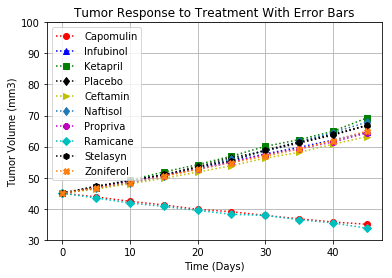

In [7]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
markers={"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:', 
         "Ceftamin": 'y>:', "Naftisol": 'd:', "Propriva":'m8:', "Ramicane":'cD:', "Stelasyn": 'kh:', "Zoniferol": 'X:'}
fig1, ax1 = plt.subplots()

for x in drugs:
    ax1.errorbar(tumorspread_minus_error.index, tumorspread_minus_error[x], fmt = markers[x])
ax1.legend()
plt.grid(True)
plt.title("Tumor Response to Treatment With Error Bars")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(30,100)

# Save the Figure
plt.savefig("Tumor Response to Treatment with Error.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_by_drug_time = mouse_merge_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_by_drug_df = pd.DataFrame(mean_met_by_drug_time).reset_index()

# Preview DataFrame
mean_met_by_drug_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error_met_by_drug_time = mouse_merge_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()


# Convert to DataFrame
error_met_by_drug_time_df = pd.DataFrame(error_met_by_drug_time).reset_index()

# Full view DataFrame
error_met_by_drug_time_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_time_treatment = mean_met_by_drug_df.pivot_table('Metastatic Sites', 'Timepoint', "Drug",)
error_met_volume = error_met_by_drug_time_df.pivot_table("Metastatic Sites", ['Timepoint'],'Drug')              

# Full view that Reformatting worked

met_time_treatment
#error_met_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Additional Calculation!!!

In [11]:
#Deducting the Standard Deviation from the Average Metastatic Sites
met_result_minus_error = met_time_treatment-error_met_volume
#Full View Final Metastatic Sites Data Frame
met_result_minus_error

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.085167,0.272364,0.188348,0.206248,0.167251,0.274053,0.224781,0.053668,0.152822,0.088958
10,0.194567,0.447823,0.507303,0.448891,0.360233,0.718073,0.459528,0.159711,0.354589,0.390891
15,0.242952,0.608849,0.710747,0.650724,0.698492,1.059779,0.628329,0.218073,0.629170,0.697847
20,0.490553,0.870077,0.815199,0.973847,0.968269,1.292252,0.828501,0.228396,0.751476,1.127740
25,0.636364,1.241169,1.012025,1.343304,1.314760,1.677289,1.158048,0.532744,0.938071,1.450879
30,0.917966,1.688021,1.360413,1.708088,1.800000,1.966402,1.348915,0.642641,1.158248,1.685165
35,1.012322,1.804903,1.441933,1.932700,1.936203,2.301445,1.933333,0.806384,1.321517,2.000000
40,1.205342,2.068015,1.785534,2.417608,2.144965,2.869372,2.343875,0.939409,1.270518,2.485924


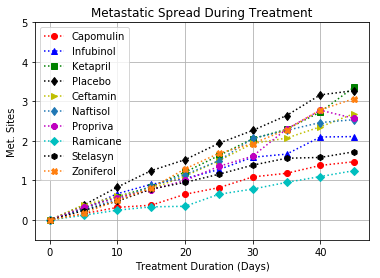

In [12]:
# Generate the Plot (without Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
markers={"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:', 
         "Ceftamin": 'y>:', "Naftisol": 'd:', "Propriva":'m8:', "Ramicane":'cD:', "Stelasyn": 'kh:', "Zoniferol": 'X:'}
fig2, ax2 = plt.subplots()

for x in drugs:
    ax2.errorbar(met_time_treatment.index, met_time_treatment[x], fmt = markers[x])
ax2.legend()
plt.grid(True)
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.ylim(-.5,5)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()


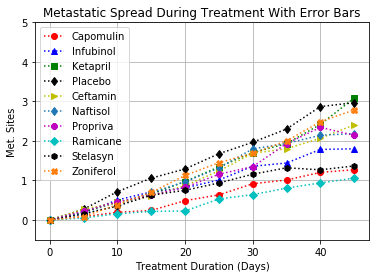

In [13]:
# Generate the Plot (with Error Bars)
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
markers={"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:', 
         "Ceftamin": 'y>:', "Naftisol": 'd:', "Propriva":'m8:', "Ramicane":'cD:', "Stelasyn": 'kh:', "Zoniferol": 'X:'}
fig2, ax2 = plt.subplots()

for x in drugs:
    ax2.errorbar(met_result_minus_error.index, met_result_minus_error[x], fmt = markers[x])
ax2.legend()
plt.grid(True)
plt.title("Metastatic Spread During Treatment With Error Bars")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.ylim(-.5,5)

# Save the Figure
plt.savefig("Metastatic Spread During Treatment With Error.png")
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_drug_timepoint = mouse_merge_df.groupby(["Drug", "Timepoint"])['Mouse ID'].count()
#mouse_survival_rate = mouse_merge_df[["Drug", "Timepoint","Mouse ID"]]
#mouse_count_drug_timepoint_df = (mouse_count_drug_timepoint)
mouse_count_drug_timepoint_df = pd.DataFrame(mouse_count_drug_timepoint)
#mouse_survival_rate_df_1 = mouse_count_drug_timepoint_df.set_index[['Drug', 'Timepoint' 'Mouse ID']]


# Convert to DataFrame
mouse_count_drug_timepoint_df.reset_index(inplace=True)
mouse_count_drug_timepoint_df_1 = mouse_count_drug_timepoint_df.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
mouse_count_drug_timepoint_df_1.head()





,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_pvt=pd.pivot_table(mouse_merge_df, values="Mouse ID",
                              columns=["Drug"],index=["Timepoint"], aggfunc='count')

# View the Data Frame
survival_rates_pvt


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
#Count Percentage Mouse Survival Rate
percent_survival_rate = (1-(survival_rates_pvt.iloc[0]-survival_rates_pvt)
                         /survival_rates_pvt.iloc[0])*100
# View the Data Frame
percent_survival_rate


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


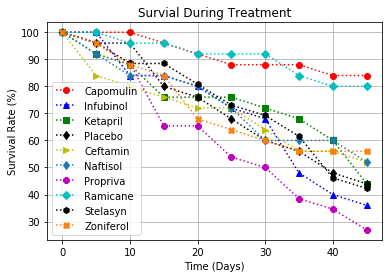

In [17]:
# Generate the Plot (Accounting for percentages)


drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
markers={"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:', 
         "Ceftamin": 'y>:', "Naftisol": 'd:', "Propriva":'m8:', "Ramicane":'cD:', 
         "Stelasyn": 'kh:', "Zoniferol": 'X:'}
fig3, ax3 = plt.subplots()
for y in drugs:   
    ax3.errorbar(percent_survival_rate.index, percent_survival_rate[y], fmt = markers[y])
ax3.legend()
plt.grid(True)
plt.title("Survial During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')

# Save the Figure
plt.savefig("Mouse Survival Rates.png")
# Show the Figure
plt.show()


## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
tumor_summary =(tumor_time_treatment.iloc[-1]/(tumor_time_treatment.iloc[0])-1)*100

# Display the data to confirm
tumor_summary

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

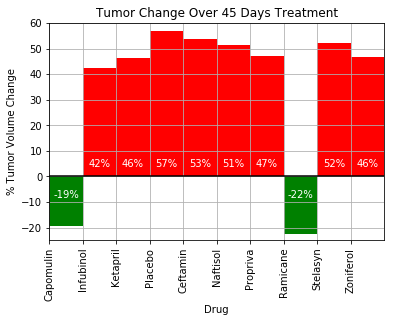

In [21]:
# Initializing the plot
success = tumor_summary<0
tumor_change_over_time = np.arange(len(tumor_summary))
drugs=["Capomulin", "Infubinol", "Ketapril", "Placebo","Ceftamin","Naftisol", 
       "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(drugs, tumor_summary, align ="edge", width=1, color=["r" if tumor_summary[x] >0 
                                                    else "g" for x in np.arange(len(drugs))])

update_plt = plt.bar(drugs, tumor_summary, align ="edge", width=1,
                    color=success.map({True:'g',False:'r'}) )


#Formating Bar Graph 
plt.xticks( drugs, rotation = "vertical")
plt.title("Tumor Change Over 45 Days Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.axhline(y=0, color = 'black')
plt.xlim(0,len(drugs))
plt.ylim(-25,60)

# Label Percentage
def autolabel(hghts):
    for hght in hghts:
        height = hght.get_height()
        if height > 0:
            label = 3 
            plt.text(hght.get_x()+ hght.get_width()/2., label, '%d' % int(height)+'%', 
                    color='white', ha='center', va='bottom')
        elif height < 0:
            label = -9
            plt.text(hght.get_x()+ hght.get_width()/2., label, '%d' % int(height)+'%', 
                    color='white', ha='center', va='bottom')



#Save the Figure
plt.savefig("Tumor Spread Over 45 Day Treatment Bar Graph.png")


# Show the Figure
autolabel(update_plt)
#plt.show()



FINAL ANALYSIS


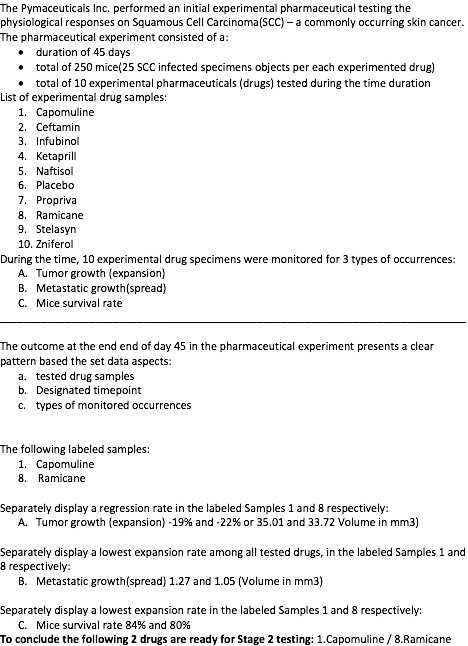